# Laporan Proyek Machine Learning - M. Fakhrizal Nur Athoilah


# Domain Proyek
---
## Latar Belakang
Diabetes merupakan salah satu penyakit kronis yang prevalensinya terus meningkat secara global, termasuk di Indonesia. Deteksi dini terhadap risiko diabetes sangat penting untuk mencegah komplikasi yang lebih serius. Dengan kemajuan teknologi, khususnya dalam bidang machine learning, kini dimungkinkan untuk memprediksi risiko diabetes berdasarkan data medis dan gaya hidup individu.

Dalam proyek ini, digunakan dataset dari Kaggle yang berjudul "Diabetes Prediction Dataset". Dataset ini mencakup berbagai variabel seperti usia, jenis kelamin, tekanan darah, kadar glukosa, dan faktor gaya hidup lainnya. Tujuan dari proyek ini adalah membangun model prediktif yang dapat mengklasifikasikan individu ke dalam kategori berisiko atau tidak berisiko terkena diabetes.

Masalah prediksi diabetes termasuk dalam domain kesehatan masyarakat dan kesehatan digital (e-health), khususnya pada area predictive analytics untuk pencegahan penyakit tidak menular. Diabetes adalah penyakit metabolik kronis yang ditandai dengan kadar gula darah tinggi, yang jika tidak ditangani secara dini, dapat menimbulkan komplikasi serius seperti penyakit jantung, gagal ginjal, kebutaan, bahkan kematian dini.

---
## Mengapa Masalah Ini Perlu Diselesaikan?
Peningkatan kasus diabetes secara global, terutama di negara berkembang seperti Indonesia, menjadi perhatian utama WHO. Menurut data International Diabetes Federation (IDF), pada tahun 2021 terdapat lebih dari 537 juta orang dewasa di dunia yang hidup dengan diabetes, dan angka ini diperkirakan akan meningkat menjadi 643 juta pada tahun 2030 [1]. Di Indonesia sendiri, prevalensi diabetes terus meningkat dari tahun ke tahun menurut data Riskesdas Kemenkes RI [2].

Pendekatan tradisional dalam deteksi dini diabetes umumnya memerlukan pemeriksaan laboratorium yang mahal dan waktu tunggu yang lama. Dengan menerapkan model machine learning yang memanfaatkan data gejala dan demografis, deteksi risiko diabetes dapat dilakukan lebih cepat, murah, dan bersifat preventif. Hal ini penting untuk meningkatkan kualitas hidup dan menekan beban biaya kesehatan nasional.

---
## Bagaimana Masalah Ini Diselesaikan?
Masalah ini diselesaikan dengan membangun sistem prediksi berbasis machine learning menggunakan dataset yang memuat berbagai indikator gejala diabetes dan informasi pasien. Model dikembangkan dengan membandingkan berbagai algoritma klasifikasi, dan hasil terbaik digunakan sebagai dasar rekomendasi prediksi. Model ini dapat diterapkan dalam sistem e-health, aplikasi mobile, maupun sistem informasi rumah sakit sebagai alat bantu skrining awal.

Selain itu, insight yang dihasilkan dari model dapat digunakan oleh pembuat kebijakan untuk merancang program pencegahan yang lebih tepat sasaran.

---
## Referensi
[1] International Diabetes Federation. “IDF Diabetes Atlas, 10th ed.,” 2021.

[Online]. Available: https://www.diabetesatlas.org

[2] Kementerian Kesehatan RI. “Hasil Utama Riskesdas 2018,” Badan Penelitian dan Pengembangan Kesehatan, Jakarta, 2019.

[3] N. Kumar et al., “Diabetes Detection using Machine Learning: A Review,” Materials Today: Proceedings, vol. 61, pp. 436–441, 2022. [Online]. Available: https://doi.org/10.1016/j.matpr.2022.05.087


# Business Understanding
---
**Problem Statements**
1. Banyak individu yang tidak menyadari bahwa mereka memiliki risiko tinggi terkena diabetes hingga munculnya gejala serius atau komplikasi. Hal ini menyebabkan keterlambatan dalam diagnosis dan pengobatan.
2. Deteksi dini terhadap risiko diabetes sering kali membutuhkan pemeriksaan medis lanjutan yang memakan waktu dan biaya, yang tidak semua orang dapat akses.
3. Dalam dunia medis, dibutuhkan metode alternatif yang cepat, akurat, dan efisien dalam memprediksi risiko diabetes berdasarkan data yang mudah dikumpulkan.

**Goals**
1. Mengembangkan model prediksi berbasis machine learning (Logistic Regression) yang mampu mengidentifikasi individu dengan risiko tinggi terkena diabetes secara dini menggunakan data gejala dan demografi.
2. Menyediakan alat bantu diagnosis yang lebih murah dan cepat sebagai alternatif awal sebelum melakukan tes laboratorium lanjutan.
3. Menyediakan sistem berbasis data yang dapat diintegrasikan dalam sistem informasi rumah sakit atau aplikasi kesehatan untuk membantu pengambilan keputusan medis.

**Solution Statements**
1. Menerapkan algoritma Logistic Regression sebagai baseline model karena kesederhanaannya dan interpretabilitasnya dalam masalah klasifikasi biner seperti deteksi diabetes.
2. Melakukan evaluasi performa model menggunakan metrik seperti accuracy, precision, recall, dan F1-score untuk memastikan bahwa model memiliki kinerja yang dapat diandalkan dalam mendeteksi risiko diabetes.
3. (Improvement)
Model Logistic Regression dapat disempurnakan melalui:
- Hyperparameter tuning, seperti pengaturan C (regularization strength) dan penalty untuk menghindari overfitting atau underfitting.
- Feature selection untuk memastikan hanya fitur relevan yang digunakan dalam pelatihan model.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Link Dataset : https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Submission_machine_learning_terapan_1/archive/Dataset of Diabetes .csv')

In [ ]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


# Data Undestanding

Dataset yang digunakan dalam proyek ini adalah [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset) yang diperoleh dari situs [Kaggle](https://www.kaggle.com/). Dataset ini berisi data medis dari pasien, termasuk parameter-parameter laboratorium yang umum digunakan dalam diagnosis dan pemantauan diabetes. Tujuan penggunaan dataset ini adalah untuk membangun model klasifikasi yang dapat memprediksi apakah seorang pasien mengidap diabetes atau tidak.

Dataset ini terdiri dari 14 kolom, yaitu 13 fitur input dan 1 kolom target (CLASS). Data ini mencakup informasi penting seperti usia, jenis kelamin, kadar urea, kreatinin, HbA1c, dan profil lipid. Total terdapat 1000 baris data.

Tautan sumber data: https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset

---
### **Penjelasan Variabel pada Dataset:**
- `ID`: Nomor identitas data
- `No_Pation`: Nomor pasien
- `Gender`: Jenis kelamin pasien
- `AGE`: Usia pasien
- `Urea`: Kadar urea dalam darah
- `Cr`: Kadar kreatinin
- `HbA1c`: Kadar HbA1c (indikator rata-rata gula darah)
- `Chol`: Total kolesterol
- `TG`: Trigliserida
- `HDL`: High-Density Lipoprotein (kolesterol baik)
- `LDL`: Low-Density Lipoprotein (kolesterol jahat)
- `VLDL`: Very-Low-Density Lipoprotein
- `BMI`: Indeks massa tubuh
- `CLASS`: Label target (positif atau negatif diabetes)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [ ]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

- Dataset ini berisi 1000 baris data.

- Ada 14 kolom tang terdiri dari:
  - Numerik (12 kolom):
      - 8 kolom bertipe float64: Urea, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI
      - 4 kolom bertipe int64: ID, No_Pation, AGE, Cr
  - Kategorikal (2 kolom):
      - Gender: kemungkinan berisi 'Male' / 'Female'
      - CLASS: target label seperti 'Diabetic', 'Prediabetic' dan 'Non-Diabetic'

## 1. EDA - Bivariate

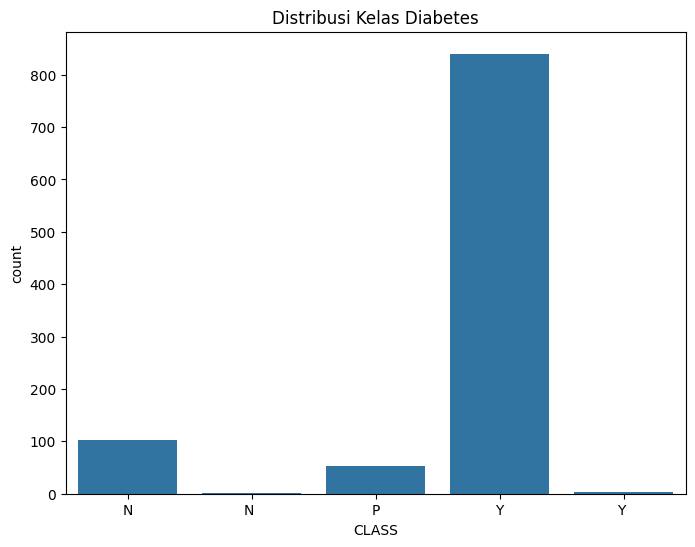

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CLASS', data=df)
plt.title('Distribusi Kelas Diabetes')
plt.show()

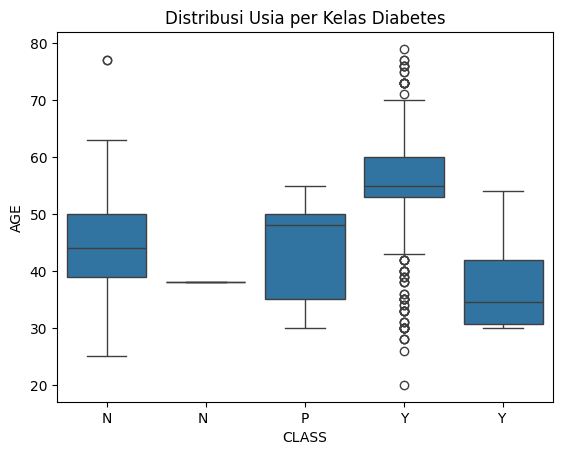

In [ ]:
sns.boxplot(x='CLASS', y='AGE', data=df)
plt.title('Distribusi Usia per Kelas Diabetes')
plt.show()

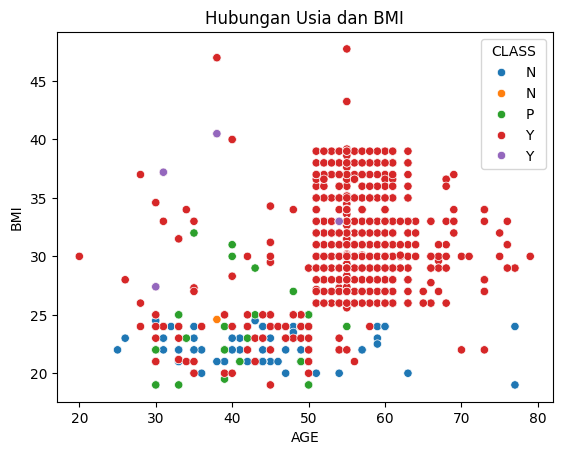

In [ ]:
sns.scatterplot(x='AGE', y='BMI', hue='CLASS', data=df)
plt.title('Hubungan Usia dan BMI')
plt.show()

Dengan mengamati hubungan fitur terhadap kolom CLASS, didapatkan insight sebagai berikut:

- Mayoritas pasien berada pada kelas Y (penderita diabetes), menunjukkan ketidakseimbangan kelas.
- Rata-rata usia pasien kelas Y lebih tinggi dibandingkan kelas lainnya, berkisar di usia 55 tahun.
- BMI pasien kelas Y cenderung lebih tinggi dan terkonsentrasi pada rentang 25–35, mengindikasikan risiko obesitas yang berkaitan dengan diabetes.

## 2. EDA - Multivariate

In [ ]:
# Drop kolom non-numerik terlebih dahulu
numeric_df = df.drop(columns=['ID', 'No_Pation', 'Gender', 'CLASS'])

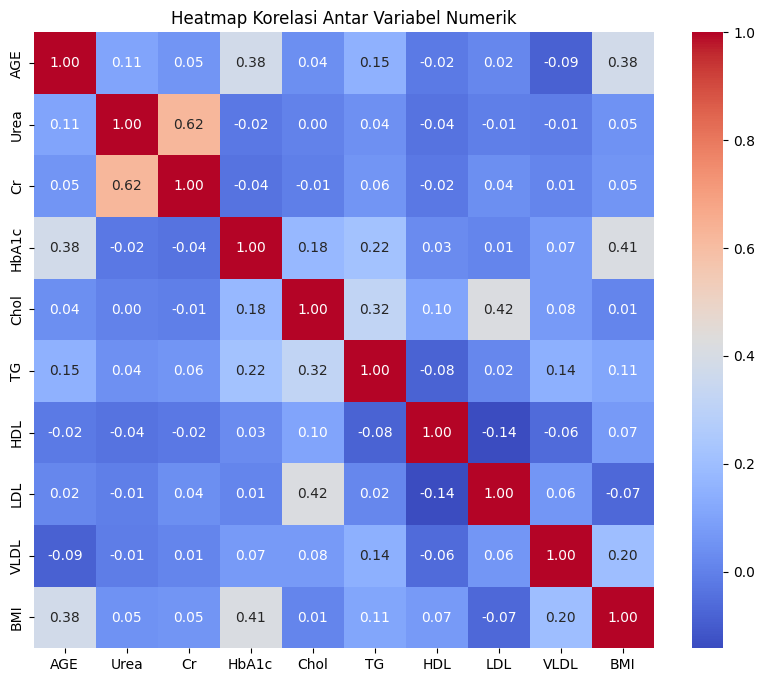

In [ ]:
# Korelasi
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

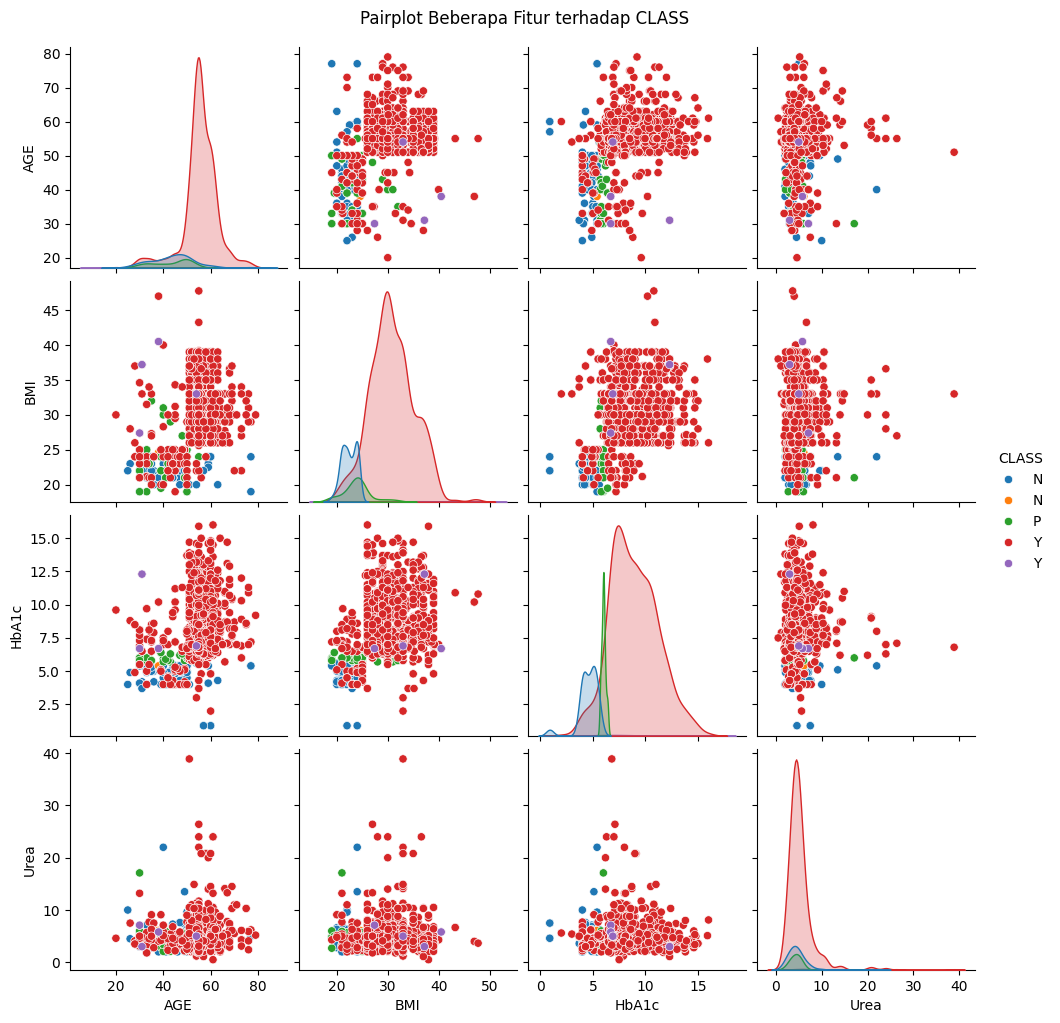

In [ ]:
sns.pairplot(df[['AGE', 'BMI', 'HbA1c', 'Urea', 'CLASS']], hue='CLASS')
plt.suptitle('Pairplot Beberapa Fitur terhadap CLASS', y=1.02)
plt.show()

Setelah melihat hubungan antar fitur numerik dan terhadap kelas CLASS, diperoleh insight berikut:

- Urea dan Cr memiliki korelasi tertinggi sebesar 0.62.
- HbA1c memiliki korelasi positif sedang terhadap BMI, sekitar 0.41.
- Pasien dengan kelas Y umumnya memiliki kombinasi nilai AGE tinggi, BMI tinggi, dan HbA1c tinggi.
- Distribusi kelas Y mendominasi pada hampir semua kombinasi fitur numerik utama.


## 3. Check Missing Values, Duplicated dan Outliers

In [ ]:
df.isna().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat nilai kosong dan duplikat satupun pada data.

In [ ]:
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Cek outlier di semua kolom numerik
for col in numeric_df:
    outliers = find_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outlier(s)")

AGE: 98 outlier(s)
Urea: 65 outlier(s)
Cr: 52 outlier(s)
HbA1c: 6 outlier(s)
Chol: 27 outlier(s)
TG: 55 outlier(s)
HDL: 50 outlier(s)
LDL: 11 outlier(s)
VLDL: 74 outlier(s)
BMI: 3 outlier(s)


Terdapat beberapa outlier yang terlihat disini dan ini harus segera diatasi.

# Data Preparation

Pada tahap ini, dilakukan 6 tahapan data preparation secara berurutan agar data siap digunakan untuk proses modeling dan hasil prediksi yang optimal. Tahapan tersebut meliputi:

1. Mengatasi Outlier

Pertama-tama, dilakukan identifikasi dan penanganan outlier pada data. Outlier adalah nilai ekstrem yang dapat mengganggu distribusi data dan menurunkan performa model. Dengan mengatasi outlier, model dapat belajar dari pola data yang lebih representatif.

2. Encoding Data

Selanjutnya, dilakukan encoding pada fitur yang bersifat kategorikal agar dapat diolah oleh algoritma machine learning yang biasanya hanya menerima input numerik. Proses ini mengubah data kategori menjadi format numerik yang dapat dipahami oleh model.

3. Menghapus Nilai NaN

Menghapus Nilai NaN Untuk memastikan bahwa semua kolom dataset tidak mengandung nilai kosong, dilakukan penghapusan semua baris yang memiliki nilai NaN pada kolom ini menggunakan fungsi dropna(). Langkah ini penting agar model prediksi tidak menerima data dengan label yang tidak diketahui. Setelah proses ini, jumlah data tersisa adalah 676 baris dengan 14 kolom.

4. Splitting Data

Data kemudian dibagi menjadi data training dan data testing dengan proporsi tertentu. Tujuan pemisahan ini adalah untuk melatih model pada data training dan menguji performanya secara objektif pada data testing yang belum pernah dilihat model sebelumnya.

5. Standarisasi

Setelah itu, dilakukan standarisasi pada fitur numerik untuk mengubah data ke skala yang sama dengan mean nol dan standar deviasi satu. Proses ini penting agar fitur dengan rentang nilai berbeda tidak mendominasi proses training, terutama untuk algoritma sensitif terhadap skala data.

6. SMOTE (Synthetic Minority Over-sampling Technique)

Tahap terakhir adalah penyeimbangan kelas menggunakan teknik SMOTE. Karena dataset ini mengalami ketidakseimbangan kelas target, SMOTE digunakan untuk membuat sampel sintetis pada kelas minoritas sehingga model tidak bias terhadap kelas mayoritas dan performa prediksi pada kelas minoritas meningkat.

---
### **Alasan Tahapan Data Preparation diperlukan**
- Mengatasi Outlier: Mencegah nilai ekstrem mengganggu proses pelatihan dan memperbaiki representasi data.
- Encoding Data: Mengubah data kategorikal menjadi format numerik agar dapat diproses model.
- Menghapus Nilai NaN: Menghindari error dan bias saat pelatihan model, karena model tidak dapat belajar dari data tanpa label (CLASS) yang lengkap.
- Splitting Data: Menjaga objektivitas evaluasi model dengan menggunakan data yang belum pernah dilihat selama pelatihan.
- Standarisasi: Menyamakan skala fitur agar setiap fitur berkontribusi seimbang terhadap model.
- SMOTE: Mengatasi ketidakseimbangan kelas untuk meningkatkan kemampuan model dalam mengenali kelas minoritas.



## 1. Mengatasi Outliers

In [ ]:
for col in numeric_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus baris yang di luar batas
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df.shape

(678, 14)

## 2. Encoding Data

In [ ]:
# Encoding kolom Gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# Encoding kolom CLASS
df['CLASS'] = df['CLASS'].map({
    'N': '-1',
    'P': '0',
    'Y': '1'
})

# Cek hasilnya
print(df[['Gender', 'CLASS']].head())

    Gender CLASS
5      0.0    -1
6      0.0    -1
7      1.0    -1
13     0.0    -1
14     0.0    -1


In [ ]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,634,34224,0.0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,-1
6,721,34225,0.0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,-1
7,421,34227,1.0,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,-1
13,132,34234,0.0,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,-1
14,402,34235,0.0,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,193,454316,1.0,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1,1
990,194,454316,0.0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
991,195,4543,NaN,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,1
992,196,454316,1.0,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1


## 3. Menghapus Nilai NaN

In [ ]:
all_columns = df.columns.tolist()
columns_to_check_for_na = [col for col in all_columns if col != 'CLASS']
df.dropna(subset=columns_to_check_for_na, inplace=True)

Penghapusan nilai NAN pada kolom selain CLASS yang diwakili dengan variabel columns_to_check_for_na.


In [ ]:
df.dropna(subset=['CLASS'], inplace=True)

print("\nMissing values in CLASS after dropping rows with NaN in CLASS:")
print(df['CLASS'].isna().sum())

print("\nShape after dropping rows with NaN in CLASS:")
print(df.shape)


Missing values in CLASS after dropping rows with NaN in CLASS:
0

Shape after dropping rows with NaN in CLASS:
(676, 14)


## 4. Splitting Data

In [ ]:
X = df.drop(columns=['CLASS'])
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Standarisasi

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Modeling

**Regresi logistik** adalah algoritma pembelajaran mesin terbimbing yang digunakan untuk tugas klasifikasi yang bertujuan untuk memprediksi probabilitas bahwa suatu contoh termasuk dalam kelas tertentu atau tidak. Regresi logistik adalah algoritma statistik yang menganalisis hubungan antara dua faktor data.

In [ ]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Model ini digunakan dengan parameter default, yang berarti tidak dilakukan perubahan pada nilai parameter saat inisialisasi model. Parameter default yang digunakan pada LogisticRegression() dari library scikit-learn, di antaranya:

- `penalty='l2'` : Regularisasi L2 (Ridge).
- `C=1.0` : Invers dari kekuatan regularisasi.
- `solver='lbfgs'` : Algoritma optimisasi.
- `max_iter=100` : Jumlah maksimum iterasi untuk konvergensi.

**Cara kerjanya:**

dimulai dengan menghitung gabungan dari semua fitur input dan bobotnya. Hasil dari perhitungan ini kemudian diubah menjadi nilai probabilitas menggunakan fungsi khusus yang disebut fungsi sigmoid.

Nilai probabilitas tersebut menunjukkan seberapa besar kemungkinan suatu data termasuk ke dalam kelas tertentu. Jika nilainya lebih tinggi dari ambang batas (biasanya 0.5), maka data diklasifikasikan ke dalam satu kelas (misalnya, 1). Jika lebih rendah, maka diklasifikasikan ke kelas lainnya (misalnya, 0).

Saat proses pelatihan, model belajar untuk menyesuaikan bobot-bobotnya agar bisa memprediksi label dengan lebih akurat. Logistic Regression juga menggunakan teknik regularisasi untuk mencegah model terlalu mengikuti pola data latih, sehingga tetap bekerja baik pada data baru.

Secara keseluruhan, Logistic Regression bekerja dengan cepat, sederhana, dan sangat cocok untuk masalah klasifikasi biner yang memiliki hubungan yang cukup linier antara fitur dan target.

**Kelebihan** dan **Kekurangan** Logistic Regression

Kelebihan:
- Model sederhana dan mudah diinterpretasikan.
- Cepat dalam proses training dan prediksi.
- Cocok untuk masalah klasifikasi biner dengan hubungan linear antara fitur dan target.

Kekurangan:
- Kurang efektif jika data memiliki pola non-linear.
- Sensitif terhadap multikolinearitas dan fitur yang tidak distandarisasi.

# Evaluation

Dalam proyek ini, dilakukan evaluasi terhadap model klasifikasi menggunakan beberapa metrik utama, yaitu:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

Metrik-metrik ini dipilih karena sangat umum digunakan dalam kasus klasifikasi dan mampu memberikan gambaran menyeluruh mengenai performa model, baik secara keseluruhan maupun per kelas.

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
# Matrix klasifikasi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  9   3   1]
 [  0  10   4]
 [  2   3 104]]


Ini menunjukkan bahwa:

- Kelas -1: 9 benar, 3 salah ke kelas 0, 1 salah ke kelas 1
- Kelas 0: 10 benar, 4 salah ke kelas 1
- Kelas 1: 104 benar, 5 salah ke kelas -1 atau 0

In [ ]:
# Klasifikasi Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.69      0.75        13
           0       0.62      0.71      0.67        14
           1       0.95      0.95      0.95       109

    accuracy                           0.90       136
   macro avg       0.80      0.79      0.79       136
weighted avg       0.91      0.90      0.91       136



## **Interpretasi:**

- Akurasi tinggi (90%) menunjukkan model secara umum dapat memprediksi dengan baik.
- Kelas 1 memiliki kinerja terbaik karena memiliki jumlah data terbanyak (109), dengan precision, recall, dan F1-score semua 0.95.
- Kelas 0 memiliki precision yang paling rendah (0.62), artinya model sering salah mengklasifikasikan data lain sebagai kelas 0.
- F1-score macro average (0.79) lebih rendah dari weighted average (0.91), menunjukkan model cenderung lebih baik pada kelas mayoritas (kelas 1) dibandingkan kelas minoritas (-1 dan 0).

## **Kesimpulan**
Penelitian ini bertujuan untuk menjawab tantangan dalam deteksi dini risiko diabetes, terutama bagi individu yang tidak memiliki akses terhadap pemeriksaan medis lanjutan dan sering kali tidak menyadari kondisi kesehatannya hingga muncul gejala serius. Dengan memanfaatkan data gejala dan demografi yang relatif mudah dikumpulkan, model Logistic Regression berhasil dikembangkan sebagai solusi prediktif awal yang cepat, murah, dan dapat diakses luas.

Hasil evaluasi menunjukkan bahwa model memiliki akurasi keseluruhan sebesar 90% dan F1-score yang sangat tinggi (0.95) pada kelas mayoritas (label 1). Namun, performa pada kelas minoritas (label -1 dan 0) masih perlu ditingkatkan, dengan F1-score masing-masing sebesar 0.75 dan 0.67. Hal ini mencerminkan tantangan klasik dalam klasifikasi data tidak seimbang, yang perlu menjadi perhatian utama dalam pengembangan lebih lanjut.

Model ini menjawab secara langsung problem statement yang telah diuraikan, dengan memberikan alternatif sistem prediksi awal yang dapat digunakan sebagai alat bantu diagnosis sebelum melakukan pemeriksaan laboratorium yang lebih kompleks. Selain itu, pendekatan ini sangat potensial untuk diintegrasikan dalam sistem informasi rumah sakit atau aplikasi kesehatan berbasis data, guna mendukung pengambilan keputusan medis dan meningkatkan kesadaran masyarakat akan risiko diabetes.

Untuk meningkatkan performa model secara lebih seimbang ke semua kelas, disarankan untuk melakukan:
- Penyeimbangan data, seperti oversampling pada kelas minoritas atau undersampling kelas mayoritas.
- Pengaturan class weight dalam algoritma Logistic Regression agar model lebih sensitif terhadap kelas-kelas dengan jumlah data lebih sedikit.

Dengan pengembangan lebih lanjut, model ini dapat menjadi fondasi bagi sistem deteksi dini diabetes yang lebih akurat dan inklusif.
